# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

['albany', 'orange cove', 'vaini', 'barrow', 'tuatapere', 'bilma', 'gravdal', 'ushuaia', 'rikitea', 'surt', 'mahenge', 'victoria', 'hilo', 'norman wells', 'grand gaube', 'bella union', 'nishihara', 'baykit', 'atuona', 'marcona', 'mataura', 'mahajanga', 'dinsor', 'mys shmidta', 'georgetown', 'ilinsko-podomskoye', 'ilulissat', 'hofn', 'lolua', 'tiksi', 'avarua', 'jimma', 'punta arenas', 'khorramshahr', 'antibes', 'barentsburg', 'hermanus', 'qaanaaq', 'constitucion', 'mar del plata', 'hasaki', 'mandapam', 'khandyga', 'tongzi', 'lagoa', 'balkhash', 'sitka', 'halalo', 'arraial do cabo', 'aguimes', 'talavera', 'tarbagatay', 'khatanga', 'busselton', 'san juan', 'illoqqortoormiut', 'quatre cocos', 'yagodnoye', 'constantine', 'katsuura', 'kardla', 'vysokogornyy', 'lebowakgomo', 'salalah', 'medea', 'paka', 'saldanha', 'ballina', 'allapalli', 'bathsheba', 'alice springs', 'ancud', 'jamestown', 'college', 'valparaiso', 'provideniya', 'praya', 'mahebourg', 'leningradskiy', 'huilong', 'port alfred',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [17]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : albany
Processing Record 2 of Set 1 : orange cove
Processing Record 3 of Set 1 : vaini
Processing Record 4 of Set 1 : barrow
Processing Record 5 of Set 1 : tuatapere
Processing Record 6 of Set 1 : bilma
Processing Record 7 of Set 1 : gravdal
Processing Record 8 of Set 1 : ushuaia
Processing Record 9 of Set 1 : rikitea
Processing Record 10 of Set 1 : surt
Processing Record 11 of Set 1 : mahenge
Processing Record 12 of Set 1 : victoria
Processing Record 13 of Set 1 : hilo
Processing Record 14 of Set 1 : norman wells
Processing Record 15 of Set 1 : grand gaube
Processing Record 16 of Set 1 : bella union
Processing Record 17 of Set 1 : nishihara
Processing Record 18 of Set 1 : baykit
Processing Record 19 of Set 1 : atuona
City not found. Skipping...
Processing Record 20 of Set 1 : mataura
Processing Record 21 of Set 1 : mahajanga
City not found. Skipping...
City not found. Skipping...
Processing Record 2

Processing Record 31 of Set 4 : touros
Processing Record 32 of Set 4 : barcelona
Processing Record 33 of Set 4 : xudat
Processing Record 34 of Set 4 : yellowknife
Processing Record 35 of Set 4 : grindavik
Processing Record 36 of Set 4 : petropavlovsk-kamchatskiy
Processing Record 37 of Set 4 : lorengau
Processing Record 38 of Set 4 : saint-philippe
Processing Record 39 of Set 4 : namibe
Processing Record 40 of Set 4 : faanui
Processing Record 41 of Set 4 : ramnagar
Processing Record 42 of Set 4 : atar
Processing Record 43 of Set 4 : port lincoln
Processing Record 44 of Set 4 : ussuriysk
Processing Record 45 of Set 4 : kota bahru
Processing Record 46 of Set 4 : cap malheureux
Processing Record 47 of Set 4 : omboue
City not found. Skipping...
Processing Record 48 of Set 4 : hay river
Processing Record 49 of Set 4 : hami
Processing Record 50 of Set 4 : araouane
Processing Record 0 of Set 5 : marsh harbour
Processing Record 1 of Set 5 : ilebo
Processing Record 2 of Set 5 : sarai alamgir
Ci

Processing Record 19 of Set 8 : vila velha
Processing Record 20 of Set 8 : basco
Processing Record 21 of Set 8 : mokhotlong
Processing Record 22 of Set 8 : samana
Processing Record 23 of Set 8 : puerto baquerizo moreno
Processing Record 24 of Set 8 : rudbar
Processing Record 25 of Set 8 : luderitz
Processing Record 26 of Set 8 : bereznik
Processing Record 27 of Set 8 : oranjemund
Processing Record 28 of Set 8 : chokurdakh
Processing Record 29 of Set 8 : shaowu
Processing Record 30 of Set 8 : campeche
Processing Record 31 of Set 8 : stornoway
Processing Record 32 of Set 8 : pitea
Processing Record 33 of Set 8 : madras
Processing Record 34 of Set 8 : camana
City not found. Skipping...
Processing Record 35 of Set 8 : rantepao
Processing Record 36 of Set 8 : coihaique
City not found. Skipping...
Processing Record 37 of Set 8 : ambon
Processing Record 38 of Set 8 : erenhot
Processing Record 39 of Set 8 : warka
Processing Record 40 of Set 8 : san pedro
City not found. Skipping...
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})
weather_dict


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,5,US,1606188608,74,42.60,-73.97,35.01,1.01
1,Orange Cove,90,US,1606188940,76,36.62,-119.31,51.01,3.36
2,Vaini,75,TO,1606188689,74,-21.20,-175.20,78.80,10.29
3,Barrow,90,US,1606188690,85,71.29,-156.79,12.20,11.41
4,Tuatapere,93,NZ,1606188704,56,-46.13,167.68,63.00,10.00
...,...,...,...,...,...,...,...,...,...
548,Bereznehuvate,100,UA,1606189306,87,47.31,32.85,38.86,11.16
549,Kuusamo,75,FI,1606189306,92,65.97,29.18,30.20,9.17
550,Luganville,75,VU,1606189306,83,-15.53,167.17,82.40,11.41
551,St. Pete Beach,0,US,1606189306,87,27.73,-82.74,68.00,11.79


In [19]:
weather_group = weather_dict.describe()
weather_group_df = pd.DataFrame(weather_group)
weather_group_df

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,553.000000,5.530000e+02,553.000000,553.000000,553.000000,553.000000,553.000000
mean,54.504521,1.606189e+09,75.059675,21.291392,24.711230,53.302857,8.018246
std,39.484180,2.511302e+02,18.730402,33.277483,88.699485,25.679550,5.506753
min,0.000000,1.606188e+09,11.000000,-54.800000,-179.170000,-16.380000,0.270000
25%,11.000000,1.606189e+09,66.000000,-6.980000,-52.200000,33.800000,3.980000
50%,72.000000,1.606189e+09,78.000000,26.780000,31.110000,57.600000,6.930000
75%,93.000000,1.606189e+09,90.000000,50.540000,99.180000,75.200000,11.030000
max,100.000000,1.606189e+09,100.000000,78.220000,179.320000,104.000000,32.210000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
weather_group_df

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,553.000000,5.530000e+02,553.000000,553.000000,553.000000,553.000000,553.000000
mean,54.504521,1.606189e+09,75.059675,21.291392,24.711230,53.302857,8.018246
std,39.484180,2.511302e+02,18.730402,33.277483,88.699485,25.679550,5.506753
min,0.000000,1.606188e+09,11.000000,-54.800000,-179.170000,-16.380000,0.270000
25%,11.000000,1.606189e+09,66.000000,-6.980000,-52.200000,33.800000,3.980000
50%,72.000000,1.606189e+09,78.000000,26.780000,31.110000,57.600000,6.930000
75%,93.000000,1.606189e+09,90.000000,50.540000,99.180000,75.200000,11.030000
max,100.000000,1.606189e+09,100.000000,78.220000,179.320000,104.000000,32.210000


In [21]:
#  Get the indices of cities that have humidity over 100%.


In [22]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

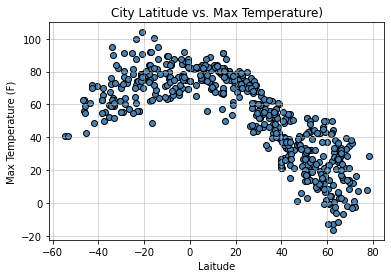

In [23]:
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

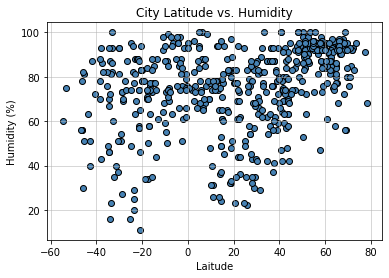

In [24]:
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

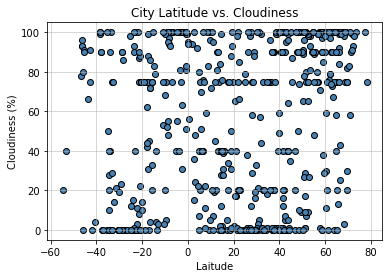

In [25]:
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

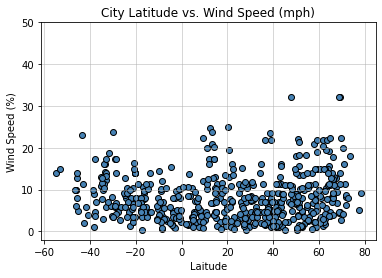

In [26]:
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [27]:
import scipy.stats as st

northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.88


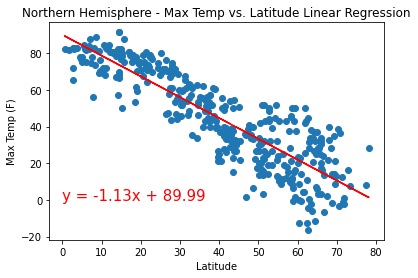

In [28]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.52


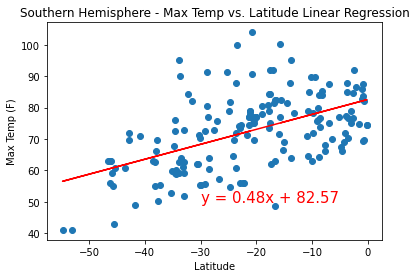

In [29]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.42


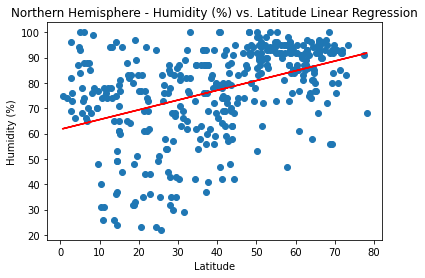

In [30]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.26


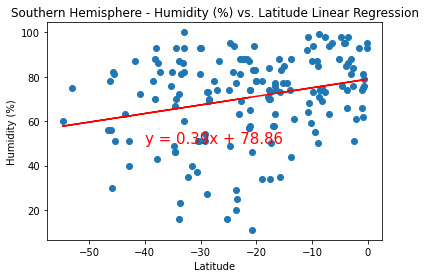

In [31]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.33


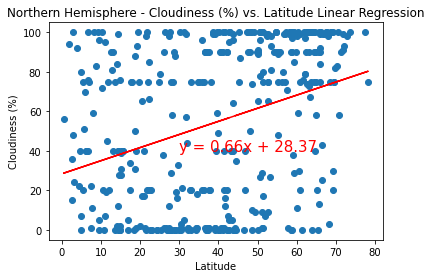

In [32]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.3


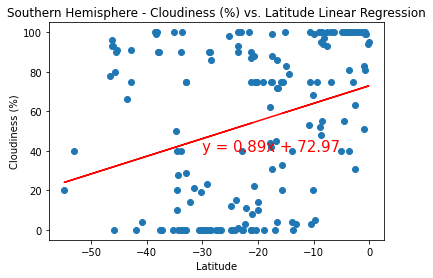

In [33]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.16


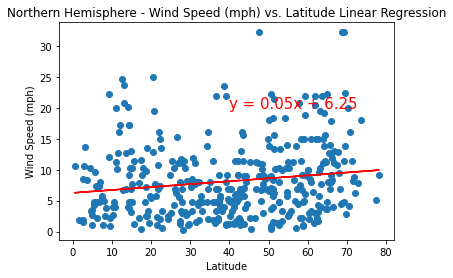

In [34]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.38


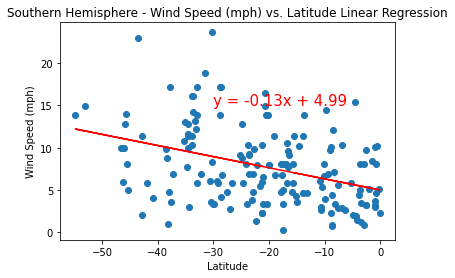

In [35]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")


In [38]:
weather_dict.to_csv("mycities.csv", index = False)